# NASDAQ Data Analysis


In [12]:
# Importing necessary libraries for data analysis and visualization
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf, coint
import statsmodels.api as sm


# 1.Load and Prepare NASDAQ Data


In [13]:
# Loading the cleaned NASDAQ data from the pickle file
with open('pickle_files/cleaned_nasdaq_dataframe.pkl', 'rb') as f:
    nasdaq_data = pickle.load(f)

# Removing the multi-index from columns for simplicity
nasdaq_data.columns = nasdaq_data.columns.droplevel(1)

# Adding 'Year' and 'Month' columns based on the datetime index
nasdaq_data['Year'] = nasdaq_data.index.year
nasdaq_data['Month'] = nasdaq_data.index.month


# 2.Yearly Trend Analysis with Box Plot


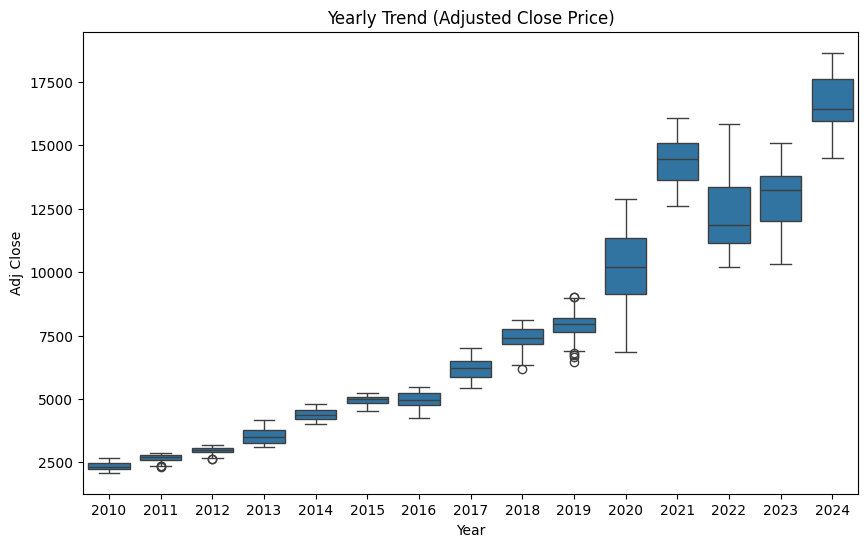

In [14]:
# Using a box plot to visualize yearly trends in the adjusted closing price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Adj Close', data=nasdaq_data)
plt.title('Yearly Trend (Adjusted Close Price)')
plt.show()


# 3.Monthly Seasonality Analysis with Box Plot


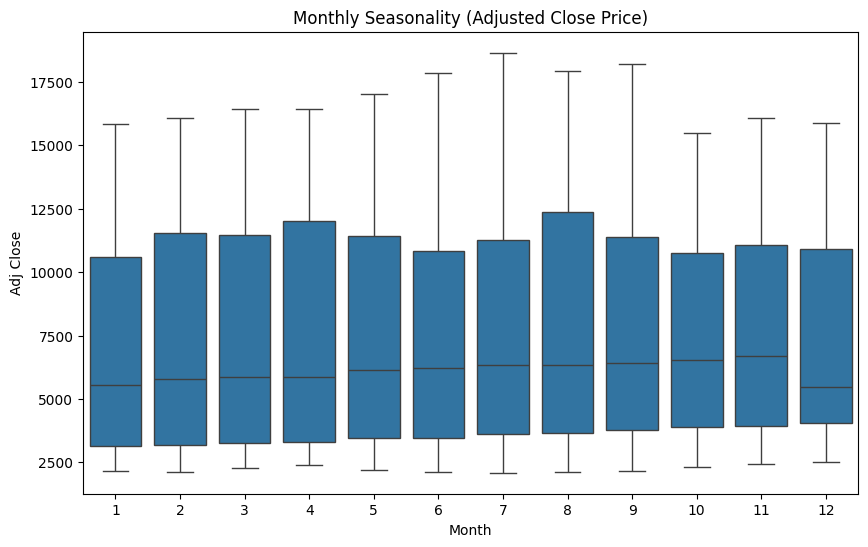

In [15]:
# Using a box plot to analyze monthly seasonality in the adjusted closing price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Adj Close', data=nasdaq_data)
plt.title('Monthly Seasonality (Adjusted Close Price)')
plt.show()


# 4.Daily, Yearly, and Quarterly Averages


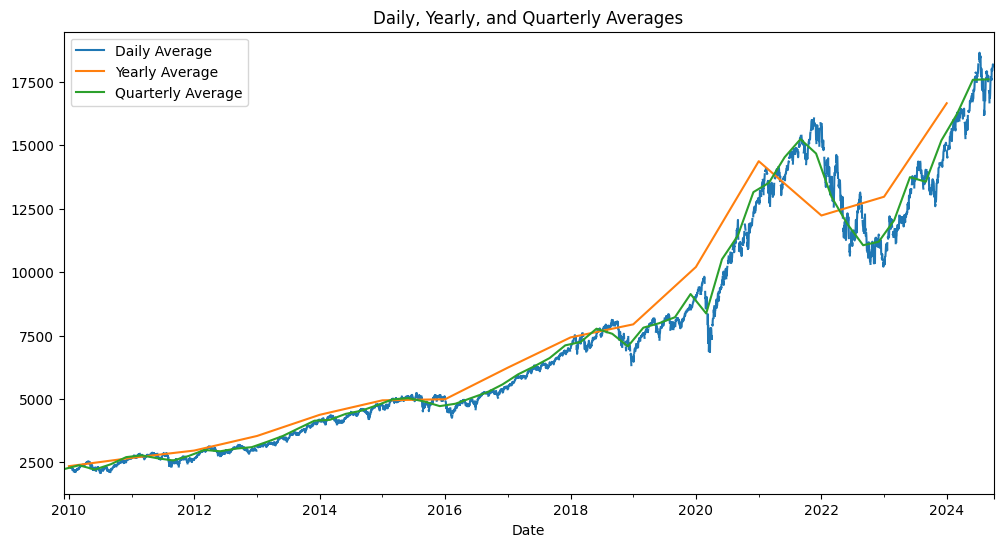

In [23]:
# Calculating daily, yearly, and quarterly averages for trend analysis
daily_avg = nasdaq_data['Adj Close'].resample('D').mean()
yearly_avg = nasdaq_data['Adj Close'].resample('YE').mean()  # Use 'YE' for end-of-year frequency
quarterly_avg = nasdaq_data['Adj Close'].resample('QE-NOV').mean()  # Use 'QE-NOV' for quarter ending in November

# Plotting the averages to observe trends over different time periods
plt.figure(figsize=(12, 6))
daily_avg.plot(label='Daily Average')
yearly_avg.plot(label='Yearly Average')
quarterly_avg.plot(label='Quarterly Average')
plt.legend()
plt.title('Daily, Yearly, and Quarterly Averages')
plt.show()


# 5.Summary Statistics


In [17]:
# Calculating key summary statistics: mean, standard deviation, median, and percentiles
mean_close = nasdaq_data['Adj Close'].mean()
std_close = nasdaq_data['Adj Close'].std()
median_close = nasdaq_data['Adj Close'].median()
percentile_10 = np.percentile(nasdaq_data['Adj Close'], 10)
percentile_90 = np.percentile(nasdaq_data['Adj Close'], 90)

# Displaying the calculated statistics
print(f"Mean: {mean_close}, Std: {std_close}")
print(f"Median: {median_close}, 10th Percentile: {percentile_10}, 90th Percentile: {percentile_90}")


Mean: 7434.796800046854, Std: 4413.8901187126685
Median: 6118.27490234375, 10th Percentile: 2686.021923828125, 90th Percentile: 14241.41259765625


# 6.Pearson Correlation and Autocorrelation Analysis


Pearson Correlation:
 Price       pct_change  Adj Close
Price                            
pct_change    1.000000   0.015018
Adj Close     0.015018   1.000000


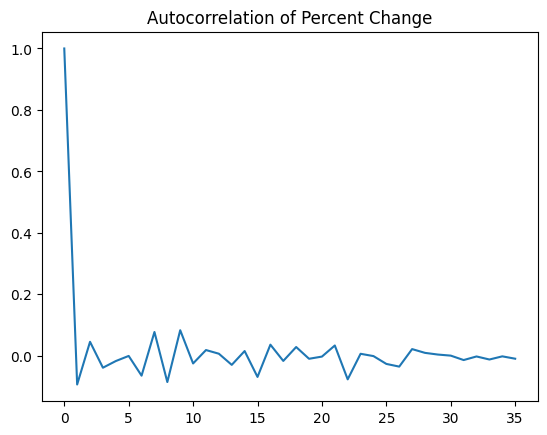

In [18]:
# Adding a column for percent change to analyze correlation and autocorrelation
nasdaq_data['pct_change'] = nasdaq_data['Adj Close'].pct_change()

# Calculating the Pearson correlation between adjusted close and percent change
corr = nasdaq_data[['pct_change', 'Adj Close']].corr(method='pearson')
print("Pearson Correlation:\n", corr)

# Plotting the autocorrelation of percent change to analyze dependencies
acf_values = acf(nasdaq_data['pct_change'].dropna())
plt.plot(acf_values)
plt.title('Autocorrelation of Percent Change')
plt.show()


# 7. Cointegration Test on Percent Changes


In [20]:
# Aligning 'Adj Close' and 'pct_change' by removing the first row bcs first day no change
adj_close_aligned = nasdaq_data['Adj Close'].iloc[1:]
pct_change_aligned = nasdaq_data['pct_change'].dropna()

# Performing the cointegration test between 'Adj Close' and 'pct_change'
coint_res = coint(adj_close_aligned, pct_change_aligned)
print('Cointegration test p-value:', coint_res[1])


Cointegration test p-value: 1.0


# 8.Random Walk Test using a Regression Model


In [21]:
# Adding a lagged column for 'Adj Close' to test for random walk characteristics
nasdaq_data['lagged_close'] = nasdaq_data['Adj Close'].shift(1)
nasdaq_data = nasdaq_data.dropna()

# Setting up the regression model with 'Adj Close' as the dependent variable and 'lagged_close' as the independent variable
X = nasdaq_data[['lagged_close']]
X = sm.add_constant(X)
y = nasdaq_data['Adj Close']

# Running the regression and printing the summary to analyze the results
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.340e+06
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:07:36   Log-Likelihood:                -22901.
No. Observations:                3709   AIC:                         4.581e+04
Df Residuals:                    3707   BIC:                         4.582e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2580      3.741      0.604   